In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Absenteeism_at_work.tsv', sep='\t')

In [3]:
data.rename(columns={'Distance from Residence to Work' : 'DTW'}, inplace=True)

In [4]:
data['index'] = data.index

In [5]:
data

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,DTW,Service time,Age,Work load Average/day,...,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,index
0,11,26,7,3,1,289,36,13,33,239.554,...,1,2,1,0,1,90,172,30,4,0
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,0,0,98,178,31,0,1
2,3,23,7,4,1,179,51,18,38,239.554,...,1,0,1,0,0,89,170,31,2,2
3,7,7,7,5,1,279,5,14,39,239.554,...,1,2,1,1,0,68,168,24,4,3
4,11,23,7,5,1,289,36,13,33,239.554,...,1,2,1,0,1,90,172,30,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,1,2,1,0,1,90,172,30,8,735
736,1,11,7,3,1,235,11,14,37,264.604,...,3,1,0,0,1,88,172,29,4,736
737,4,0,0,3,1,118,14,13,40,271.219,...,1,1,1,0,8,98,170,34,0,737
738,8,0,0,4,2,231,35,14,39,271.219,...,1,2,1,0,2,100,170,35,0,738


In [6]:
data['ID'].value_counts()

3     113
28     76
34     55
22     46
20     42
11     40
15     37
36     34
24     30
14     29
33     24
10     24
1      23
17     20
5      19
18     16
13     15
25     10
9       8
6       8
23      8
27      7
12      7
30      7
2       6
7       6
26      5
32      5
29      5
19      3
21      3
31      3
8       2
16      2
4       1
35      1
Name: ID, dtype: int64

In [7]:
data['Social drinker'] == data['Social smoker']

0      False
1      False
2      False
3       True
4      False
       ...  
735    False
736     True
737    False
738    False
739     True
Length: 740, dtype: bool

Here I am able to show that social drinker and social smoker are not the same thing. 

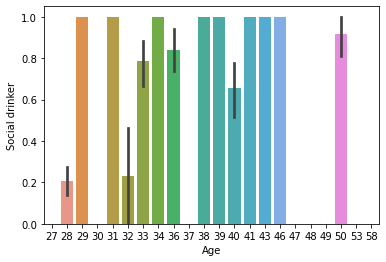

In [8]:
ax = sns.barplot(data=data, x='Age', y='Social drinker')

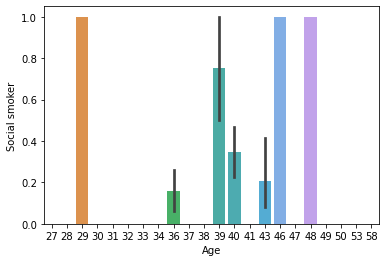

In [9]:
ax = sns.barplot(data=data, x='Age', y='Social smoker')

In these two graphs you can see that people younger than 30 and older than 40 don't always act the same 

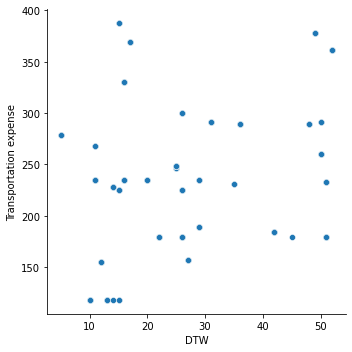

In [10]:
ax = sns.relplot(data=data, x='DTW', y='Transportation expense')

In [11]:
data['DTW'].corr(data['Transportation expense'])

0.26218311063190797

In [12]:
data1 = pd.DataFrame(data=(data.query('DTW <= 30')))

In [13]:
data1['Transportation expense'].mean()

205.6407982261641

In [14]:
data2 = pd.DataFrame(data=(data.query('DTW > 30')))

In [15]:
data['Transportation expense'].mean()

221.32972972972973

As you can see there is a relationship between distance from work and transportation expense. the further away you are the more likley it will cost more. 

In [16]:
data3 = data

In [17]:
data3['ID'] = data['ID'].astype('str')

In [18]:
data3 = pd.DataFrame(data=(data3[data3['ID'].isin(['11','3','34','28'])]))

In [19]:
data3

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,DTW,Service time,Age,Work load Average/day,...,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,index
0,11,26,7,3,1,289,36,13,33,239.554,...,1,2,1,0,1,90,172,30,4,0
2,3,23,7,4,1,179,51,18,38,239.554,...,1,0,1,0,0,89,170,31,2,2
4,11,23,7,5,1,289,36,13,33,239.554,...,1,2,1,0,1,90,172,30,2,4
5,3,23,7,6,1,179,51,18,38,239.554,...,1,0,1,0,0,89,170,31,2,5
13,3,11,7,4,1,179,51,18,38,239.554,...,1,0,1,0,0,89,170,31,1,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,34,10,6,4,1,118,10,10,37,275.089,...,1,0,0,0,0,83,172,28,3,723
728,34,28,7,2,1,118,10,10,37,264.604,...,1,0,0,0,0,83,172,28,4,728
731,34,23,7,4,1,118,10,10,37,264.604,...,1,0,0,0,0,83,172,28,2,731
733,28,22,7,4,1,225,26,9,28,264.604,...,1,1,0,0,2,69,169,24,8,733


In [20]:
data3 = pd.DataFrame(data=(data3.groupby(['Month of absence','Hit target','ID'],as_index=False)['Absenteeism time in hours']\
                           .sum().dropna(axis=1)))

# data3 = data3.unstack()

In [21]:
data3

,Month of absence,Hit target,ID,Absenteeism time in hours
0,1,95,11,11
1,1,95,28,9
2,1,95,34,20
3,1,96,11,8
4,1,96,3,8
...,...,...,...,...
92,12,93,34,8
93,12,97,28,9
94,12,97,34,122
95,12,98,28,16


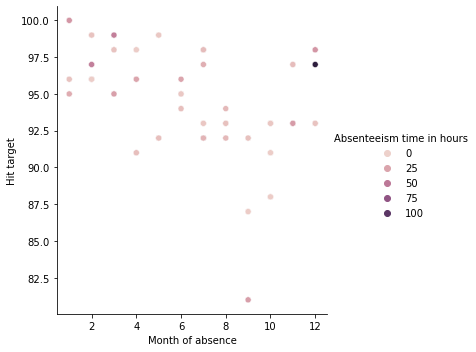

In [22]:
ax = sns.relplot(data=data3, x='Month of absence', hue='Absenteeism time in hours',y='Hit target')

as you can see when employees are not taking time off performance is down but when they are performance goes back up. 

In [23]:
data.groupby('Month of absence').sum()

,Reason for absence,Day of the week,Seasons,Transportation expense,DTW,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,index
Month of absence,,,,,,,,,,,,,,,,,,,,
0,0,13,6,528,94,41,132,813.657,285,0,3,4,2,0,11,275,515,94,0,2214
1,1137,187,100,9106,1210,613,1748,15739.883,4820,0,68,35,16,4,22,3924,8641,1310,222,15636
2,1569,296,144,15189,2585,946,2540,19454.925,6999,0,92,44,42,2,51,5643,12362,1921,294,30411
3,1685,333,201,19000,2777,1194,3245,23329.907,8475,4,111,102,52,9,49,6740,14904,2300,765,36590
4,1080,226,159,11954,1434,649,1942,14567.117,5014,1,70,66,29,4,40,4176,9180,1391,482,22574
5,1059,247,192,14376,1570,766,2325,17604.320,6224,6,105,69,31,9,44,5031,11194,1643,400,32368
6,1001,207,130,11061,1533,697,2047,16092.674,5133,3,73,32,31,4,54,4279,9326,1430,411,25775
7,1223,259,67,15522,1972,793,2427,16737.566,6367,2,81,82,44,5,52,5372,11580,1794,734,22223
8,1154,204,54,13122,1711,659,2020,12852.282,5019,0,69,64,34,9,51,4377,9258,1487,288,12603


In [24]:
data = data.dropna().astype(int)

Evaluating data for employes in the data set there are many different variables that can lead to missing time at work, some planned some unplanned you have multiple employees with kids, pets, commute times and commute cost. not to mention factors not represented in this data set.

the Key takeaway from the data set that I was able to drill down is performance improves after an extended time off. It also seems that performance declines a little the longer employees go without taking an extended period of PTO. 

I recommened a PTO plan of unlimited PTO which will improve individual employees happiness because they can attened everything they need/want too. This will also allow Performance to opperate at top levels. 

In [25]:
data = data.rename(columns={'Absenteeism time in hours':'ATH'})

In [26]:
data4 = pd.DataFrame(data=(data.query('ATH > 8')))

In [27]:
data4 = pd.DataFrame(data=(data.query('ID == 11')))

In [28]:
data4['index']= data4.index

In [29]:
data4

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,DTW,Service time,Age,Work load Average/day,...,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,ATH,index
0,11,26,7,3,1,289,36,13,33,239,...,1,2,1,0,1,90,172,30,4,0
4,11,23,7,5,1,289,36,13,33,239,...,1,2,1,0,1,90,172,30,2,4
24,11,18,8,2,1,289,36,13,33,205,...,1,2,1,0,1,90,172,30,8,24
26,11,23,8,3,1,289,36,13,33,205,...,1,2,1,0,1,90,172,30,1,26
28,11,18,8,4,1,289,36,13,33,205,...,1,2,1,0,1,90,172,30,8,28
36,11,24,8,3,1,289,36,13,33,205,...,1,2,1,0,1,90,172,30,8,36
54,11,0,9,3,4,289,36,13,33,241,...,1,2,1,0,1,90,172,30,0,54
77,11,26,10,4,4,289,36,13,33,253,...,1,2,1,0,1,90,172,30,8,77
96,11,7,11,4,4,289,36,13,33,306,...,1,2,1,0,1,90,172,30,24,96
130,11,18,1,3,2,289,36,13,33,308,...,1,2,1,0,1,90,172,30,8,130


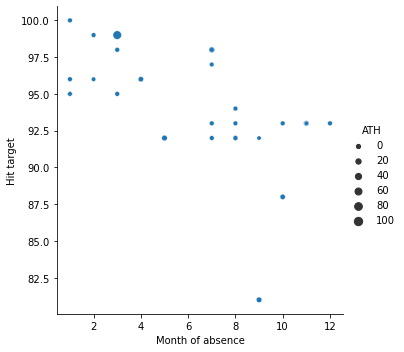

In [30]:
ax = sns.relplot(data=data4, x='Month of absence', y='Hit target', size='ATH')

If you tak a look at Month 8 9 and 10 you will see a drop in performance between 8-9 but he takes a longer time off in month 9 and in month 10 you see his performance go back up. 

In [31]:
data

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,DTW,Service time,Age,Work load Average/day,...,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,ATH,index
0,11,26,7,3,1,289,36,13,33,239,...,1,2,1,0,1,90,172,30,4,0
1,36,0,7,3,1,118,13,18,50,239,...,1,1,1,0,0,98,178,31,0,1
2,3,23,7,4,1,179,51,18,38,239,...,1,0,1,0,0,89,170,31,2,2
3,7,7,7,5,1,279,5,14,39,239,...,1,2,1,1,0,68,168,24,4,3
4,11,23,7,5,1,289,36,13,33,239,...,1,2,1,0,1,90,172,30,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264,...,1,2,1,0,1,90,172,30,8,735
736,1,11,7,3,1,235,11,14,37,264,...,3,1,0,0,1,88,172,29,4,736
737,4,0,0,3,1,118,14,13,40,271,...,1,1,1,0,8,98,170,34,0,737
738,8,0,0,4,2,231,35,14,39,271,...,1,2,1,0,2,100,170,35,0,738


In [46]:
g = pd.DataFrame(data=(data.groupby(['Month of absence','ID'], as_index=False)['ATH'].sum()))

In [47]:
g

,Month of absence,ID,ATH
0,0,4,0
1,0,8,0
2,0,35,0
3,1,1,1
4,1,3,10
...,...,...,...
233,12,28,28
234,12,30,2
235,12,33,1
236,12,34,130


In [57]:
g =g.pivot('Month of absence', 'ID').fillna(0)

In [58]:
g.reset_index(inplace=True)

In [59]:
g

Month of absence level_0                                                 \
ID                        1      2      3    4      5      6      7      8   
0                 0     0.0    0.0    0.0  0.0    0.0    0.0    0.0    1.0   
1                 1     3.0    0.0    4.0  0.0    5.0    0.0    0.0    0.0   
2                 2     0.0    0.0   16.0  0.0    0.0   17.0    0.0    0.0   
3                 3    35.0    0.0   36.0  0.0    0.0    0.0   37.0    0.0   
4                 4    57.0   58.0   59.0  0.0    0.0   60.0    0.0    0.0   
5                 5    78.0    0.0   79.0  0.0   80.0    0.0   81.0    0.0   
6                 6   102.0  103.0  104.0  0.0  105.0    0.0    0.0    0.0   
7                 7   121.0  122.0  123.0  0.0  124.0  125.0  126.0    0.0   
8                 8   144.0  145.0  146.0  0.0  147.0    0.0    0.0    0.0   
9                 9     0.0    0.0  165.0  0.0  166.0    0.0    0.0  167.0   
10               10   183.0    0.0  184.0  0.0  185.0  186.0    0.0    0.0   
11               11   202.0    0.0  203.0  0.0  204.0  205.0  206.0    0.0   
12               12   221.0    0.0  222.0  0.0  223.0    0.0    0.0    0.0   

           ...  ATH                                                         
ID      9  ...   27     28    29    30    31   32    33     34   35     36  
0     0.0  ...  0.0    0.0   0.0   0.0   0.0  0.0   0.0    0.0  0.0    0.0  
1     0.0  ...  4.0   14.0   0.0   0.0   0.0  8.0   0.0   52.0  0.0    4.0  
2     0.0  ...  9.0   30.0   2.0  16.0  16.0  0.0  10.0    2.0  0.0    0.0  
3    38.0  ...  0.0   50.0   0.0   3.0   0.0  0.0  16.0    8.0  0.0   13.0  
4     0.0  ...  0.0   27.0   0.0   0.0   0.0  0.0  20.0   12.0  0.0  127.0  
5    82.0  ...  4.0   15.0  19.0   0.0   0.0  0.0   2.0    5.0  0.0   29.0  
6     0.0  ...  0.0    8.0   0.0   0.0   0.0  2.0   0.0   29.0  0.0  118.0  
7   127.0  ...  0.0  124.0   0.0   3.0   0.0  0.0   0.0   34.0  0.0    9.0  
8   148.0  ...  8.0    0.0   0.0   7.0   0.0  0.0   5.0    9.0  0.0    4.0  
9     0.0  ...  2.0    6.0   0.0   0.0   0.0  0.0   2.0   12.0  0.0    1.0  
10  187.0  ...  0.0   23.0   0.0   0.0   0.0  6.0  10.0   11.0  0.0    3.0  
11    0.0  ...  0.0   22.0   0.0   0.0   0.0  0.0   7.0   40.0  0.0    0.0  
12    0.0  ...  0.0   28.0   0.0   2.0   0.0  0.0   1.0  130.0  0.0    3.0  

[13 rows x 109 columns]

In [35]:
# g = g.unstack()

In [36]:
f = pd.DataFrame(data=(data.groupby(['Month of absence','ID'])['Hit target'].mean()))

In [37]:
f = f.unstack().backfill().ffill().mean()

In [38]:
# f = f.unstack()

In [41]:
gf = pd.concat([g,f], axis=0)

In [60]:
gf.unstack()

ID,1,2,3,4,5,6,7,8,9,10,...,27,28,29,30,31,32,33,34,35,36
ATH,121.00,25.000000,482.000000,0.0,104.000000,72.000000,30.000000,0.000000,262.000000,186.000000,...,27.000000,347.00000,21.000000,31.000000,16.000000,16.000000,73.000000,344.000000,0.0,311.000000
Hit target,95.25,94.153846,94.710928,95.0,95.288462,93.846154,95.230769,82.076923,95.230769,94.692308,...,93.461538,94.24334,94.769231,94.615385,93.615385,92.923077,94.935897,94.791772,95.0,95.234615


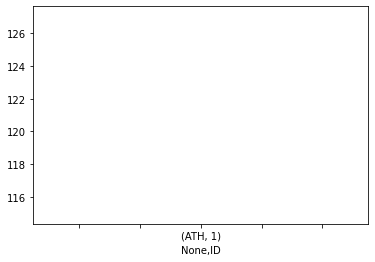

In [65]:
ax = gf.loc[:].plot()